# Object Detector

<img src='https://habrastorage.org/webt/ic/ul/rp/iculrpbc7niyrdxg1yk_8r82nsw.jpeg'>

# 1. Что это такое 

Обнаружение объекта - это метод компьютерного зрения, при котором программная система может обнаруживать, определять местонахождение и отслеживать объект по заданному изображению или видео. Особый атрибут обнаружения объекта заключается в том, что он определяет класс объекта (человек, стол, стул и т. Д.) И их координаты, зависящие от местоположения на данном изображении. Местоположение указывается путем рисования ограничительной рамки вокруг объекта. Ограничивающая рамка может точно определять положение объекта, а может и нет. Возможность найти объект внутри изображения определяет производительность алгоритма, используемого для обнаружения.

Эти алгоритмы обнаружения объектов могут быть предварительно обучены или обучены с нуля. В большинстве случаев мы используем предварительно обученные веса из предварительно обученных моделей, а затем настраиваем их в соответствии с нашими требованиями и различными вариантами использования.

 # 2. Чем задача детекции отличается от классификации

<img src='https://drek4537l1klr.cloudfront.net/elgendy/v-8/Figures/07_img_0001.png'>

Классификация изображений - это задача, при которой мы назначаем метку класса входному изображению. Например, для входного изображения кошки на выходе алгоритма классификации изображений будет метка «Кошка».

При обнаружении объектов нас интересуют не только объекты, присутствующие во входном изображении. Нас также интересует, где они находятся во входном изображении. В этом смысле обнаружение объектов выходит за рамки классификации изображений.

В большинстве приложений с несколькими объектами на входном изображении нам нужно найти расположение объектов, а затем классифицировать их. В таких случаях мы используем алгоритм обнаружения объектов.

Обнаружение объектов может быть в сотни раз медленнее, чем классификация изображений. Поэтому в приложениях, где расположение объекта на изображении не важно, мы используем классификацию изображений.

## 1. Object detector

Проще говоря, обнаружение объекта - это двухэтапный процесс:

* Найдите ограничивающие прямоугольники, содержащие объекты, так чтобы в каждом ограничивающем прямоугольнике был только один объект.
* Классифицируйте изображение внутри каждого ограничивающего прямоугольника и присвойте ему метку.

## 3. Типы методов детектирования

## 3.1 Sliding Window Approach

<img src='https://raw.githubusercontent.com/PnYuan/Practice-of-Machine-Learning/master/imgs/object_detect/concept_sliding_windows.gif'>

Большинство классических методов компьютерного зрения для обнаружения объектов, таких как каскады HAAR и HOG + SVM, используют метод скользящего окна для обнаружения объектов.

В этом подходе скользящее окно перемещается по изображению. Все пиксели внутри этого скользящего окна обрезаются и отправляются классификатору изображений.

Если классификатор изображения идентифицирует известный объект, ограничивающая рамка и метка класса сохраняются. В противном случае оценивается следующее окно.

Подход со скользящим окном является очень дорогостоящим в вычислительном отношении. Чтобы обнаруживать объекты на входном изображении, необходимо оценивать скользящие окна с разными масштабами и соотношениями сторон для каждого пикселя изображения.

## 3.2 Two-shot Detectors

### 3.2.1 R-CNN Object Detector

[Статья(2013)](https://arxiv.org/abs/1311.2524)

Поэтому подход на основе скользящего окна для обнаружения объектов был исключен. Это было слишком дорого.  Исследователи начали работать над новой идеей обучения модели машинного обучения, которая могла бы предлагать местоположения ограничивающих рамок, содержащих объекты. Эти ограничивающие рамки назывались предложениями регионов или предложениями объектов.

Предложения по регионам представляли собой просто списки ограничивающих рамок с небольшой вероятностью содержания объекта. Он не знал и не заботился о том, какой объект находится в ограничивающей рамке.

Алгоритм предложения региона выводит список из нескольких сотен ограничивающих рамок в разных местах, масштабах и соотношениях сторон. Большинство этих ограничивающих рамок НЕ содержат никаких объектов.  

Оценка классификатора изображений в нескольких сотнях ограничивающих прямоугольников, предложенных алгоритмом предложения региона, намного дешевле, чем его оценка в сотнях тысяч или даже миллионах ограничивающих прямоугольников в случае подхода со скользящим окном. Следовательно, алгоритм предложения региона по-прежнему полезен и временами удобен.

Один из первых подходов, в которых использовались предложения по регионам, был назван [Россом Гиршиком](https://www.rossgirshick.info/) и др. R-CNN (сокращение от Regions with CNN features).

<img src='https://habrastorage.org/webt/2r/2p/kp/2r2pkpcoysglv4z_v-ll_y14mqw.png'>

R-CNN (Region Convolution Neural Network) - это одна из первых архитектур для решения задачи object detection на основе сверточных нейронных сетей.
Данная архитектура состоит из трех частей:

1. Классический алгоритм компьютерного зрения, который находит области изображения, на которых потенциально могут содержаться объекты

2. Сверточная нейронная сеть, которая запускается по-отдельности в каждом найденном регионе и выдает набор фичей.

3. SVM алгоритм, который обучается на этих фичах определять те или иные классы.

Они использовали алгоритм под названием [Selective Search](https://www.koen.me/research/pub/uijlings-ijcv2013-draft.pdf) для обнаружения 2000 предложений регионов и запустили классификатор изображений на основе CNN + SVM на этих 2000 ограничивающих прямоугольниках.

Более подробно про алгоритм [здесь](https://www.pyimagesearch.com/2020/06/29/opencv-selective-search-for-object-detection/).
Он позволяет составить набор гипотез (класс объекта пока не имеет значения) и на основе сегментации определить границы объектов по интенсивности пикселей, перепаду цветов, контраста и текстур.

<img src='https://images.deepai.org/converted-papers/1802.02522/images/selective_search.jpg' width=600>

Точность R-CNN в то время была на высшем уровне, но скорость все еще была очень низкой (порядка 1 минуты на изображение на графическом процессоре).

### 3.2.3 Fast R-CNN Object Detector

[статья(2015)](https://arxiv.org/abs/1504.08083)

Но классификация 2000 картинок - это прям очень дорого! Поэтому решили ускорить процесс. Для этого алгоритм selective search Росс Гиршик доработал и значительно ускорили процесс. 

Идея заключалась в том, чтобы рассчитать одну карту характеристик для всего изображения вместо 2000 карт характеристик для 2000 регионов. 

Идея заключалась в том, что все вот эти регионы очень сильно пересекались. И все свертки и остальное мы вычисляем очень много-много раз для одних и тех же пикселей. И вопрос: можно ли это все как-то вычислять по-быстрее, не делать одних и тех же вычислений на одинаковых пикселях?  
И из-за работы свертки вытекает один способ как это можно сделать:

Для каждого предложения региона объединяющий слой области интересов (RoI) извлекал вектор признаков фиксированной длины из карты признаков. Затем каждый вектор признаков использовался для двух целей:  
* Отнесите регион к одному из классов (например, собака, кошка, фон).
* Повысьте точность исходного ограничивающего прямоугольника с помощью регрессора ограничивающего прямоугольника.

<img src='https://www.pvsm.ru/images/2019/07/10/viju-znachit-sushestvuyu-obzor-Deep-Learning-v-Computer-Vision-chast-2-8.png'>


С этими изменениями алгоритм детектирования стал работать примерно за 3 секунды на изображение.

### 3.2.4 Faster R-CNN Object Detector

[статья(2015)](https://arxiv.org/abs/1506.01497)  
[Реализация в pytorch(torchvision)](https://pytorch.org/vision/stable/models.html#faster-r-cnn)

<img src='https://habrastorage.org/webt/6v/h_/ye/6vh_yee2zrsflyhh8jdvtm_bbgy.png'>

Идея следующая - регионы предложений тоже генерировать нейросетью.

План следующий. Мы берем картинку. Мы прогоняем свертки через всю картинку разом и в результате получаем наш feature maps, из которого мы раньше делали pooling и классифицировали какой там объект.  
Будем же использовать этот feature maps для того, что бы предсказывать какие у нас регионы.
Мы будем тренировать дополнительную систему (маленькую сеть) Region Proposal Network.

Пока что такая система конекта сетей - лучшая для решения задачи детекции. 
Время работы теперь порядка 0.2 секунды на изображение.

### 3.2.5 Mask-RCNN


[статья(2017)](https://arxiv.org/abs/1703.06870)   
[Реализация в pytorch(torchvision)](https://pytorch.org/vision/stable/models.html#mask-r-cnn)

Mask-RCNN — уникальную в своём роде нейросеть, которая решает и задачу детектирования, и instance-сегментации одновременно — она предсказывает точные маски объектов внутри bounding box’ов. Её идея на самом деле довольно проста — есть две ветки: для детекции и для сегментации, и нужно обучать сеть на обе задачи сразу. Главное — иметь размеченные данные. Сам по себе Mask-RCNN устроен очень похоже на Faster-RCNN: backbone тот же, но в конце две «головы» (так часто называют последние слои нейросети) под две разные задачи.

<img src='https://habrastorage.org/webt/7w/ig/hq/7wighq6ox7tptik5f_7d7cez2hg.png'>

## 3.3 One-shot detectors

### 3.3.1 You only look once (YOLO)

[статья(2015)](https://arxiv.org/abs/1506.02640)

<img src='https://habrastorage.org/webt/qj/ml/w_/qjmlw_ympdcib6jkpfdjdvcirdy.png' width=700>

Есть подходы которые работают еще быстрее. Например подход yolo. Идея следующая: Взять картинку, прогнать ее один раз через сверточную сеть и получить результат. 

Посмотрим, что находится на выходе backbone сети - это тензор $width * height * channels$. Вектор, который имеет размерность $1 * 1 * channels$ описывает некоторую область исходного изображения и то, что происходит вокруг этой группы пикселей.

Из этого вектора мы хотим получить 5 значений:
1. есть ли в этой ячейке объект 
2. смещение по x
3. смещение по y
4. ширина объекта
5. высота объекта


<img src='https://drive.google.com/uc?export=view&id=1Gcnz5r9Iff3iCW85jU52Ct02FOp-nDnf'>



Смещения изменяются от 0 до 1 - это величина, показывающая, где именно в группе пикселей находится центр объекта. <img src='https://drive.google.com/uc?export=view&id=1dWcnUUPmXjMycKfcFPusaWLJtlcwP9Sm'>



Тут проблема в линейном слое - из него столько информации очень сложно получить, поэтому можем заменить этот слой на сверточный. На выходе будем получать 5 каналов (наши 5 выходов: вероятность появления объекта, смещения по x, y, ширина и высота объекта).

C архитектурой выше мы никак не решаем задачу классификации, но можем добавить C каналов, и поверх них будем ставить Softmax для классификации.

<img src='https://drive.google.com/uc?export=view&id=1vFhT8u1Vnb2L79kqu9-m9GQ4qljeNlel'>


То, что обсудили выше - это и есть архитектура YOLO. Но тут есть проблема. В одной группе пикселей может быть несколько объектов, но с такой архитектурой мы не сможем детектировать более, чем один объект. На помощь нам приходят якоря.

Добавим детектор маленьких объектов, средних объектов и больших, получаем уже 3 объекта, которые можем находить в ячейках, если якорей сделаем больше, то соответственно будет больше возможных объектов в ячейках. И всё это можно сделать с помощью одной свертки. Если на один объект была свертка, переводящая 512 каналов в (5 + С), то на три объекта это свертка будет переводить из 512 каналов в (5 + С) * 3.

Разные размеры объектов (маленькие, средние, большие) называются якорями (Anchor). Их можно выбирать не только по размерам, но и по пропорциям: маленький объект вытянутый по горизонтали, маленький объект вытянутый по вертикали и так далее для всех остальных размеров и уже имеем 9 разных якорей.

<img src='https://drive.google.com/uc?export=view&id=1Katco7s1yJqs8PQfINl93wNnN5buIy79'>

YOLO разбивает все изображение на фиксированное количество квадратов. Затем за один проход она пытается предсказать в разных комбинациях этих квадратов те или иные классы. Таким образом данная нейронная сеть несколько теряет в точности, но существенно приобретает в скорости работы.

### **Non-maximum Suppression (NMS)**


[Более подробно](https://towardsdatascience.com/non-maximum-suppression-nms-93ce178e177c).

Наша нейронная сеть из-за большого количества якорей в одном суперпикселе будет генерить много bounding box'ов наших объектов, теперь нужно их отфильтровать. Это можно сделать с помощью подхода Non-maximum suppression.

<img src='https://drive.google.com/uc?export=view&id=1AU4_4sc1jIkwUVICPu-uMorhKPfXNrAC' width=500>


Если у двух bounding box'ов IoU больше заданного трешхолда, то мы считаем, что эти два bounding box'а совпадают, дальше нужно задать трешхолд по вероятности, если вероятность первого bb меньше порога, то избавляемся от него или же от второго bb, если его вероятность меньше порога.
Если вероятность у двух bb хорошие, то будем объединять их, путем растягивания bounding box'a, который будет охватывать обе границы.


<img src='https://drive.google.com/uc?export=view&id=1yEsQJKQtUSxwdw-yE2KxCQTbManIuxQp' width=600>

### 3.3.2 SSD (Single Shot MultiBox Detector)

Данная архитектура появилась в 2016 г. и различные ее модификации являются одними из самыми применяемых на практике.

Проблема YOLO, что мы предсказываем объекты только на основании последней карты активации, но ведь можно предсказывать более мелкие объекты из ранних карт активаций.

<img src='https://habrastorage.org/webt/jr/i3/oy/jri3oymb48sv5vq9dwwdxbndszg.png' width=700>


Она также как и YOLO является одностадийным дектором, также как и YOLO пытается на лету определить boundig box'ы и классы, но считывание ее результатов происходит на разных масштабах в конце нейронной сети, подобному так как это происходит в архитектуре FPN.

### 3.3.3  Retina Net


[статья(2018)](https://arxiv.org/pdf/1708.02002.pdf)   
[Реализация в pytorch(torchvision)](https://pytorch.org/vision/stable/models.html#retinanet)


Проблемы SSD:
- мелкие объекты получаются из ранних активационных карт
- но в ранних активационных картах совсем нет информации о контексте

Чтобы учитывать контекст для детекции можем объединить идеи SSD и сегментациия со skip connections.

Дальние карты активаций учитывают контекст и большие объекты, а ближние слои учитывают мальнькие объекты, нам нужно соединить мелкие признаки с контекстом с помощью конкатенаций.

<img src='https://blog.dataiku.com/hs-fs/hubfs/aerial_4.png?width=1500&name=aerial_4.png' width=800>

# Практический пример 

# 4. Loss-функции

## 4.1 В общем о функциях потерь в pytorch

То, как вы конфигурируете свои функции потерь, может повлиять на производительность вашего алгоритма. Правильно настроив функцию потерь, вы можете убедиться, что ваша модель будет работать так, как вы хотите.

Ваши нейронные сети могут выполнять множество разных задач. Будь то классификация данных, например, группировка изображений животных по кошкам и собакам, или задачи регрессии, такие как прогнозирование ежемесячных доходов, или что-то еще. Каждая задача имеет свой результат и требует разного типа функции потерь.

К счастью для нас, есть функции потерь, которые мы можем использовать, чтобы максимально использовать задачи машинного обучения.

В этом параграфе мы поговорим о популярных функциях потерь в PyTorch и о создании пользовательских функций потерь.

Модуль torch.nn PyTorch имеет несколько стандартных функций потерь, которые вы можете использовать в своем проекте.

Чтобы добавить их, вам нужно сначала импортировать следующие библиотеки:

In [ ]:
import torch 
import torch.nn as nn

Затем определите тип потерь, который вы хотите использовать. Вот как например определить функцию потерь средней абсолютной ошибки:

In [ ]:
loss = nn.L1Loss()

## 4.2 Какие функции потерь доступны в pytorch

Вообще говоря, функции потерь в PyTorch делятся на две основные категории: потери регрессии и потери классификации.
Функции регрессионных потерь используются, когда модель прогнозирует непрерывное значение, например возраст человека.
Функции потери классификации используются, когда модель прогнозирует дискретное значение, например, является ли электронное письмо спамом или нет.

С полным списком доступных функций потерь можно ознакомится [здесь](https://pytorch.org/docs/stable/nn.html#loss-functions), а так же [здесь](https://pytorch.org/docs/stable/nn.functional.html#loss-functions)

### 4.2.1 Mean Absolute Error (L1 Loss Function)

In [ ]:
torch.nn.L1Loss()

L1Loss()

[Средняя абсолютная ошибка](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss) (MAE), также называемая потерями L1, вычисляет среднее значение суммы абсолютных разностей между фактическими и прогнозируемыми значениями.

Он проверяет размер ошибок в наборе прогнозируемых значений, не заботясь об их положительном или отрицательном направлении. Если абсолютные значения ошибок не используются, то отрицательные значения могут аннулировать положительные значения.

Потери Pytorch L1 выражаются как:
    
$$Loss(x,y) = |x-y|,$$

где x представляет фактическое значение, а y - прогнозируемое значение.

#### Когда его можно использовать?

* Задача регрессии, особенно когда распределение целевой переменной имеет выбросы, такие как маленькие или большие значения, которые находятся на большом расстоянии от среднего значения. Считается, что он более устойчив к выбросам.

Пример:

In [ ]:
input = torch.randn(3, requires_grad=True)
target = torch.randn(3)

mae_loss = nn.L1Loss()
output = mae_loss(input, target)

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([-0.4069, -0.8185, -0.4797], requires_grad=True)
target:  tensor([-0.8839, -0.3262,  0.0206])
output:  tensor(0.4899, grad_fn=<L1LossBackward>)


### 4.2.2 Mean Squared Error Loss Function

In [ ]:
torch.nn.MSELoss()

torch.nn.modules.loss.MSELoss

[Среднеквадратичная ошибка](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) (MSE), также называемая потерями L2, вычисляет среднее значение квадратов разностей между фактическими и прогнозируемыми значениями.

Pytorch MSE Loss всегда выдает положительный результат, независимо от знака фактических и прогнозируемых значений. Чтобы повысить точность модели, вы должны попытаться уменьшить потери L2 - идеальное значение равно 0,0.

Возведение в квадрат подразумевает, что более крупные ошибки приводят к еще большим ошибкам, чем более мелкие.
Это наказывает модель за большие ошибки и поощряет мелкие ошибки.

Потери Pytorch L2 выражаются как:

$$Loss(x,y) = (x-y)^2$$

#### Когда он может быть использован?

MSE - это функция потерь по умолчанию для большинства проблем регрессии Pytorch.

In [ ]:
input = torch.randn(3, requires_grad=True)
target = torch.randn(3)

mse_loss = nn.MSELoss()
output = mse_loss(input, target)

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([ 2.0567, -1.2324,  0.3611], requires_grad=True)
target:  tensor([-0.7270,  0.7924, -1.9354])
output:  tensor(5.7078, grad_fn=<MseLossBackward>)


### 4.2.3 Negative Log-Likelihood Loss Function

Функция Negative Log-Likelihood Loss (NLL) применяется только к моделям с функцией softmax в качестве выходного слоя активации. Softmax относится к функции активации, которая вычисляет нормированную экспоненциальную функцию каждой единицы в слое.

Функция Softmax выражается как:

$$ S({f_y}_i) = \frac{e^{{f_y}_i}}{\sum{j}e^f_j}$$

Функция принимает входной вектор размера N, а затем изменяет значения таким образом, что каждое из них находится между 0 и 1. Кроме того, она нормализует выходные данные так, чтобы сумма N значений вектора была равна 1.

NLL использует отрицательную коннотацию, поскольку вероятности (или правдоподобия) варьируются от нуля до единицы, а логарифмы значений в этом диапазоне отрицательны. В итоге величина убытка становится положительной.

В NLL минимизация функции потерь помогает нам получить лучший результат. Отрицательное логарифмическое правдоподобие получается из аппроксимации оценки максимального правдоподобия (MLE). Это означает, что мы стараемся максимизировать логарифмическую вероятность модели и, как результат, минимизировать NLL.

В NLL модель наказывается за правильный прогноз с меньшей вероятностью и поощряется за прогноз с более высокой вероятностью. Логарифм делает наказание.

NLL заботится не только о том, чтобы прогноз был правильным, но и о том, чтобы модель была уверена в прогнозе с высоким баллом.

Потери Pytorch NLL выражаются как:

$$Loss(x,y) = -log(x_y)$$

#### Когда он может быть использован?

* Проблемы многоклассовой классификации

Пример:

In [ ]:
# size of input (N x C) is = 3 x 5
input = torch.randn(3, 5, requires_grad=True)
# every element in target should have 0 <= value < C
target = torch.empty(3, dtype=torch.long).random_(5)

m = nn.LogSoftmax(dim=1)
nll_loss = nn.NLLLoss()
output = nll_loss(m(input), target)

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[ 0.3300,  1.0195,  1.6850, -0.8231, -0.5327],
        [ 1.9358,  0.4236, -0.3804, -1.2522,  0.0437],
        [-1.0563,  0.9527, -0.0214, -0.0847, -0.8889]], requires_grad=True)
target:  tensor([4, 2, 1])
output:  tensor(2.1087, grad_fn=<NllLossBackward>)


### 4.2.4 Cross-Entropy Loss Function

In [ ]:
torch.nn.CrossEntropyLoss()

CrossEntropyLoss()

Эта [функция потерь](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) вычисляет разницу между двумя распределениями вероятностей для заданного набора событий или случайных величин.

Он используется для расчета оценки, которая суммирует среднюю разницу между прогнозируемыми значениями и фактическими значениями. Чтобы повысить точность модели, вы должны попытаться минимизировать оценку - оценка кросс-энтропии находится между 0 и 1, а идеальное значение равно 0.

Другие функции потерь, такие как квадрат потерь, наказывают за неправильные прогнозы. Кросс-энтропия сильно наказывает за то, что вы очень уверены и неправы.

В отличие от отрицательной логарифмической потери вероятности, которая наказывает на основе достоверности прогнозов, кросс-энтропия наказывает неверные, но надежные прогнозы, а также правильные, но менее надежные прогнозы.

Функция кросс-энтропии имеет широкий спектр вариантов, наиболее распространенным из которых является бинарная кросс-энтропия (BCE). [BCE Loss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss) в основном используется для моделей бинарной классификации; то есть модели, имеющие всего 2 класса.

Потеря кросс-энтропии Pytorch выражается как:

$$Loss(x,y) = - \sum xlog(y)$$

#### Когда он может быть использован?

* Задачи двоичной классификации, для которых это функция потерь по умолчанию в Pytorch.
* Создание уверенных моделей - прогноз будет точным и с большей вероятностью.

Пример:

In [ ]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)

cross_entropy_loss = nn.CrossEntropyLoss()
output = cross_entropy_loss(input, target)

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[-1.6533, -0.5291, -0.1502, -0.9710,  1.7366],
        [ 0.1454, -0.6475, -1.2405, -0.9042, -0.5465],
        [-0.1517, -1.6683, -0.5381,  0.4698,  0.6034]], requires_grad=True)
target:  tensor([2, 4, 3])
output:  tensor(1.6573, grad_fn=<NllLossBackward>)


### 4.2.5 Triplet Margin Loss Function

In [ ]:
torch.nn.TripletMarginLoss()

TripletMarginLoss()

[Triplet Margin Loss](https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginLoss.html#torch.nn.TripletMarginLoss) вычисляет критерий для измерения триплетных потерь в моделях. С помощью этой функции потерь вы можете рассчитать потери при наличии входных тензоров x1, x2, x3, а также запаса со значением больше нуля.

Триплет состоит из a (anchors), p (положительные примеры) и n (отрицательные примеры).

Потеря маржи Pytorch Triplet выражается как:

$$L(a,p,n) = max(d(a_i,p_i)- d(a_i, n_i) + margin, 0)$$

#### Когда он может быть использован?

* Определение относительного сходства между образцами
* Используется в задачах [определения контекста](https://neptune.ai/blog/content-based-image-retrieval-with-siamese-networks)

Пример:

In [ ]:
anchor = torch.randn(1, 8, requires_grad=True)
positive = torch.randn(1, 8, requires_grad=True)
negative = torch.randn(1, 8, requires_grad=True)

triplet_margin_loss = nn.TripletMarginLoss(margin=1.0)
output = triplet_margin_loss(anchor, positive, negative)

print('anchor: ', anchor)
print('positive: ', positive)
print('negative: ', negative)
print('output: ', output)

anchor:  tensor([[ 1.3790, -0.8773, -0.5977,  0.4939,  1.1082,  0.0233, -1.4892, -0.5871]],
       requires_grad=True)
positive:  tensor([[-0.9540,  1.0461,  0.8067,  0.1531, -0.5868,  0.7497, -0.7699,  0.0889]],
       requires_grad=True)
negative:  tensor([[ 0.9021,  0.0795,  2.6277, -0.2868,  0.1927, -0.5167,  0.7820, -0.4396]],
       requires_grad=True)
output:  tensor(0.6533, grad_fn=<MeanBackward0>)


## 4.3 Создание своей функции потерь в pytorch

PyTorch позволяет вам создавать собственные пользовательские функции потерь для реализации в ваших проектах.
Вот как вы можете создать свою собственную простую функцию потери кросс-энтропии:

In [ ]:
class customCrossEntropyFunc(nn.Module):
    def __init__(self):
        super(customCrossEntropyFunc, self).__init__()
 
    def forward(self, my_outputs, my_labels):
        # Определение размера батча
        my_batch_size = my_outputs.size()[0] 
        # Вычисляем логарифмический softmax           
        my_outputs = F.log_softmax(my_outputs, dim=1)  
        # Выделяем значения, которые соответсвуют лэйблам
        my_outputs = my_outputs[range(my_batch_size), my_labels] 
        # Возвращаем результат
        return torch.sum(-torch.log(my_outputs)) / number_examples

## 4.4 Loss в задаче object detector

Как же высчитывать loss для задачи когда у нас и классификация и регрессия прямоугольных коробок? В этом случае нужно отдельно высчитать loss для каждого из этих двух случаев и просто сложить их с определенным коэффициентом (обычно равен 0.5)  

$$L = L_c(p, y_c) + \lambda * L_2(\begin{bmatrix}x \\y \\ \omega\\ h\end{bmatrix} - y_b)$$


И этот подход работает аналогичным образом для остальных случаев, когда нейронная сеть должна решать несколько задач.

# 5. Подготовка данных

## 5.1 Dataset и Dataloader

С помощью модуля Dataset мы можем оформить наши данные как нам нужно. Для этого делаем следующим образом:

Импортируем нужные нам модули из [torch.utils.data](https://pytorch.org/docs/stable/data.html):

In [ ]:
from torch.utils.data import Dataset, DataLoader

И затем создаем класс наследуемый от [Dataset](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset):

In [ ]:
class customDataset(Dataset):
    # Здесь мы определяем наши данные. Обычно картинки и метки.
    def __init__(self, x, y, transforms=False):
        self.transforms = transforms
        self.x = x
        self.y = y
    
    # Так же нужно переопределить метод __len__
    def __len__(self):
        return len(self.x)
    
    # И этот метод в который будет возвращать нам один сэмпл наших данных
    def __getitem__(self, idx):
        """Здесь производим необходимые преобразования над нашими данными"""
        return self.x[idx], self.y[idx]

И затем для конкретной загрузки наших данных в нейронную сеть используется [Dataloader](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader):

In [ ]:
train_dataset = customDataset(input, target)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

## 5.2 Нормализация данных

Одной из очень стандартных вещей, которая помогает нам при обучении - это нормализация данных.

- Один из вариантов - это сместить наш набор данных к центру. Т.е. вычесть среднее. Т.о. берем смотрим на наш набор данных. Находим среднюю картинку. И из всех картинок вычитаем эту среднюю картинку.
- Другой вариант. Если по разным осям разные масштабы. Т.е. например если по одной оси данные меняются сильно, а по другой чуть-чуть, то имееет смысл провести нормализацию по масштабам. Чтобы оси были одинакового масштаба. В данном случае к формуле добавляется стандартное отклонение.   
Для картинок обычно достаточно провести первый вариант нормализации.

<img src='https://drive.google.com/uc?export=view&id=1rga71AlQYUOCuMrr4_zC6jZHZLuYYT8q' width=700>

## 5.3 Аугментация данных

### Модуль transforms

Так как очень много работ связано непосредственно с изображениями, то у нас зачастую бывает что изображений либо мало, либо мы их должны как-то преобразовывать, либо мы хотим как-то расширить наш датасет. Тогда мы можем воспользоваться методами transforms, реализованным в библиотеке torchvision. 

Какие у него особенности?
 - Не со всеми форматами изображений он работает. Нам нужно преобразовывать наши изображения в формат изображений библиотеки PIL
 
На прошлом занятии мы затрагивали тему transforms. Брали от туда метод ToTensor, благодаря которому мы могли перевести изображения в тензорный формат. И т.о. мы могли обучать на этих тезорах нашу модель. 

https://pytorch.org/vision/stable/transforms.html

In [ ]:
from scipy import misc
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt


img = Image.fromarray(misc.face())

In [ ]:
type(img)

PIL.Image.Image

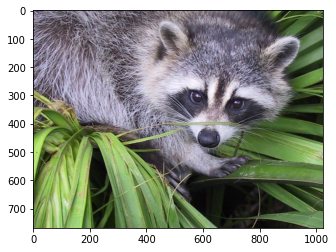

In [ ]:
plt.imshow(img)
plt.show()

Благодаря методам из transforms мы можем видоизменять наши изображения. Например поворачивать, вырезать и т.д.

In [ ]:
data_transforms = transforms.Compose([
        transforms.RandomResizedCrop((100, 100)), # рандомно вырезает из картинки картинку размера 100х100
        # transforms.ToTensor() # нужно для работы с нейронными сетями, но не будет отображаться через plt
        ])

In [ ]:
img_crop = data_transforms(img)

In [ ]:
type(img_crop)

PIL.Image.Image

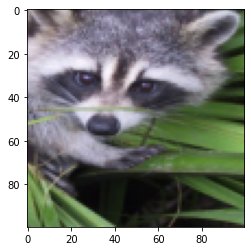

In [ ]:
plt.imshow(img_crop)
plt.show()

Так же мы можем создавать не по одному трансформу, а по несколько композицию(от сюда слово Compose). Метод Compose принимает список из трансформов.

In [ ]:
transformations = transforms.Compose([
    transforms.Resize(size=(255, 255), ),
    transforms.RandomRotation(degrees=90),
    transforms.ColorJitter(brightness=2, contrast=2),
    transforms.CenterCrop(size=224)
    # transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        # std=[0.229, 0.224, 0.225])
])

In [ ]:
img_center_crop = transformations(img)

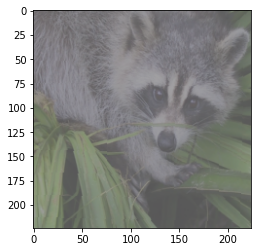

In [ ]:
plt.imshow(img_center_crop)
plt.show()

### [Albumentations](https://github.com/albumentations-team/albumentations_examples/blob/master/notebooks/example_bboxes.ipynb)

https://albumentations.ai/

In [ ]:
import albumentations as alb
from albumentations.pytorch import ToTensor
import numpy as np


alb_transform = alb.Compose(
    [
        alb.Resize(height=256, width=256),
        alb.RandomCrop(height=224, width=224),
        alb.HorizontalFlip(p=0.5),
        alb.SmallestMaxSize(max_size=160),
        alb.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=1),
        alb.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        alb.RandomBrightnessContrast(p=0.5),
        alb.OneOf([
            alb.MotionBlur(p=1),
            alb.OpticalDistortion(p=1),
            alb.GaussNoise(p=1)                 
        ], p=1),
        alb.Normalize(mean=(0.485, 0.456, 0.406),
                      std=(0.229, 0.224, 0.225)),
        # ToTensor(),
    ]
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


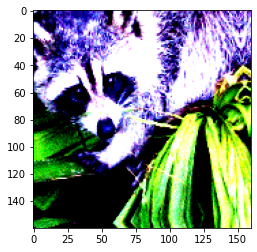

In [ ]:
alb_img = alb_transform(image=np.array(img))['image']
plt.imshow(alb_img)

# 2. Практика

Обнаружение объектов - очень популярная задача в компьютерном зрении, где по изображению вы прогнозируете (обычно прямоугольные) рамки вокруг объектов, присутствующих на изображении, а также распознаете типы объектов. На вашем изображении может быть несколько объектов, и существуют различные современные методы и архитектуры для решения этой проблемы, такие как Faster-RCNN и YOLO.

В данном вебинаре рассказывается о случае, когда на изображении присутствует только один интересующий объект. Основное внимание здесь уделяется не самой модели, а тому, как правильно читать изображение и его ограничивающую рамку, изменять размер и выполнять аугментации. Цель состоит в том, чтобы хорошо понять фундаментальные идеи, лежащие в основе обнаружения объектов, которые вы можете расширить, чтобы лучше понять более сложные методы.

### Задачи

https://www.kaggle.com/julichitai/gb-road-sign-detection-pytorch

Для изображения, состоящего из дорожного знака, спрогнозировать ограничивающую рамку вокруг дорожного знака и определить тип дорожного знака.
Эти знаки могут принадлежать четырем различным классам:  
* Светофор
* Стоп
* Ограничение скорости
* Пешеходный переход

Это называется многозадачная задача обучения, поскольку она включает в себя выполнение двух задач: 
1) регрессия для нахождения координат ограничивающего прямоугольника,   
2) классификация для определения типа дорожного знака. 

https://www.kaggle.com/julichitai/gb-penn-fudan-detection-pytorch

## Домашнее задание

1. Вам нужно будет загрузить и оформить датасет котиков, собак https://www.kaggle.com/andrewmvd/dog-and-cat-detection 
2. *Нужно будет произвести аугментацию данных
3. Затем обучить нейронную сеть на получившемся датасете

